# 2020 Primary Election Twitter Analysis

Scraped close to 482,000 Tweets about three candidates who were predicted to lead, along with tweets about the Iowa caucuses, for data exploration and analysis. Tweets were collected by Twint, running get_tweets.py daily, which saves the results in a pickle file.

# More EDA with TF-IDF vectorization
### Tokenizing, creating a bag of words, and determing the frequency of words and assigning weight to them

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
df = pd.read_pickle('cleanDf.pkl')

In [3]:
print(df.tweet[200])

CNN doesnt want you to watch all these videos..search "joe biden social security cut" on YouTube  


In [3]:
## after investigating the tweets some more, there were "pic.twitter" links
for i, row in tqdm(df.iterrows()):
    df.at[i,'tweet'] = re.sub("(pic.twitter.com)+\/.+",'',row['tweet'])
    
print(df.tweet[200])

455952it [02:30, 3029.83it/s]

CNN doesnt want you to watch all these videos..search "joe biden social security cut" on YouTube  


In [5]:
df.to_pickle('cleanDf.pkl')

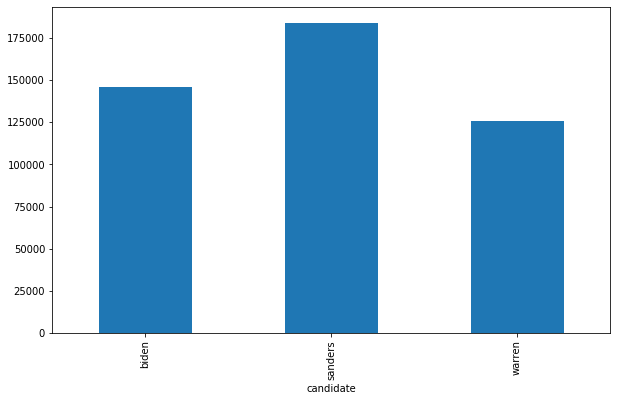

In [4]:
### distribution of tweets
df.groupby(['candidate'])['tweet'].count().plot(kind='bar',figsize=(10,6))
# plt.savefig('dist-tweets.png')

In [5]:
df.describe()

,likes,replies,retweets,ratio,sentiment
count,4.559520e+05,455952.000000,455952.000000,455952.000000,455952.000000
mean,7.708949e+02,54.302902,215.354382,0.117852,0.050909
std,5.940889e+03,466.304908,1720.854199,0.306633,0.485201
min,0.000000e+00,0.000000,0.000000,0.000000,-0.999500
25%,1.100000e+01,1.000000,1.000000,0.006791,-0.304900
50%,1.120000e+02,5.000000,19.000000,0.040741,0.000000
75%,3.260000e+02,21.000000,93.000000,0.105504,0.440400
max,1.911685e+06,93013.000000,460432.000000,34.195122,0.999500


In [6]:
print(df[df.retweets>93].shape)
print(df[df.retweets<93].shape)

(113318, 15)
(341814, 15)


In [7]:
df[df.retweets>93].head(10)

,id,date,timezone,tweet,user_id_str,likes,replies,retweets,search,near,geo,source,candidate,ratio,sentiment
12,1217957258467979265,2020-01-16 18:50:13,EST,Still talking about the Warren fib/lie/misunde...,20479813,534,107,114,joe biden,,,,biden,0.200375,-0.5610
53,1217948461443747840,2020-01-16 18:15:16,EST,Trump & Giuliani attempted to manufacture an i...,18382184,690,17,175,joe biden,,,,biden,0.024638,0.0000
63,1217947245955383296,2020-01-16 18:10:26,EST,"BREAKING: ""Coup Update: Senate must let Presid...",18247062,1028,36,454,joe biden,,,,biden,0.035019,-0.4926
64,1217947054850310145,2020-01-16 18:09:40,EST,"Dear USA, We dont like your President, can...",824472044913983488,215,6,120,joe biden,,,,biden,0.027907,0.2686
82,1217944574951329795,2020-01-16 17:59:49,EST,New: It looks like Ihor Kolomoisky used Lev Pa...,1489840663,257,9,153,joe biden,,,,biden,0.035019,0.3612
90,1217943813118926849,2020-01-16 17:56:48,EST,"""Is She (Pelosi) trying to payback President @...",56561449,2826,219,896,joe biden,,,,biden,0.077495,0.0000
95,1217943377674743808,2020-01-16 17:55:04,EST,Harris on Biden Testifying 👇 …,41634520,575,268,189,joe biden,,,,biden,0.466087,0.0000
104,1217942504110202883,2020-01-16 17:51:35,EST,Warren and Biden both backed it.Schumer Praise...,829715365223682048,381,12,107,joe biden,,,,biden,0.031496,-0.4404
106,1217942314934554624,2020-01-16 17:50:50,EST,"Today its Ukraine , GAO , Parmas , Giuliani , ...",1083551928821448710,270,9,143,joe biden,,,,biden,0.033333,-0.0772
115,1217941258351644673,2020-01-16 17:46:38,EST,"Obama, Biden, Comey, etc. discussed the Clinto...",50434327,113,5,148,joe biden,,,,biden,0.044248,0.2304


Below is a series of functions that demonstrate how TF-IDF generally works, but I will be using NLTK to do most of the work.

In [61]:
def tokenize_tweets(can_df):
    tokens = []
    for i,row in tqdm(can_df.iterrows()):
        tokens.append(row['tweet'].lower().split(' '))
    return [x for y in tokens for x in y]

In [62]:
b_tokens = tokenize_tweets(df[df.candidate=='sanders'])

184140it [00:49, 3725.70it/s]


In [66]:
## The tweets are not as clean as they could be -- punctuation should be removed
def clean_tweets(words):
    punct = ['.',',',"'","?","!",";",'(',')','"']
    for i in range(len(words)):
        for char in words[i]:
            if char in punct:
                words[i] = words[i].replace(char,'')
    return words

In [67]:
b_tokens = clean_tweets(b_tokens)

In [68]:
## vectorizing each tweet to have a count of each word -- creating bags of words
def vectorize(tokenized_tweet):
    unique_words = list(set(tokenized_tweet))
    bag_o_words = {word:0 for word in unique_words}
    for word in tokenized_tweet:
        bag_o_words[word]+=1
    return bag_o_words

In [75]:
bernie_bow = vectorize(b_tokens)

In [76]:
## caculates the frequency of each word over the total number of unique words
def tf(bow):
    total_words = sum(bow.values())
    for word,value in bow.items():
        bow[word] = value / total_words
    return bow

In [77]:
### the inverse document frequency aims to lessen the weight of words that are very frequent--like the and is
def idf(docs):
    vocab = set()
    # loop list of docs and add words to vocab
    for doc in docs:
        for word in doc.keys():
            vocab.add(word)
    
    # create dict for full vocab word frequency
    full_vocab = {i:0 for i in vocab}
    
    for word, val in tqdm(full_vocab.items()):
        count = 0
        # loop through tweets to count words
        for doc in docs:
            if word in doc:
                count += 1
                
        # calculate IDF
        full_vocab[word] = np.log((len(docs)/ float(count)))
    
    return full_vocab

In [78]:
## calculate td-idf for each candidate's tweets
def tf_idf(docs):
    doc_tf_idf = {}
    idf_ = idf(docs)
    full_vocab_list = {i:0 for i in idf_.keys()}
    
    tf_idf_list_of_dicts = []
    
    # Now, compute tf and then use this to compute and set tf-idf values for each document
    for doc in tqdm(docs):
        doc_tf = tf(doc)
        for word in doc_tf:
            doc_tf_idf[word] = doc_tf[word] * idf_[word]
        tf_idf_list_of_dicts.append(doc_tf_idf)
    
    return tf_idf_list_of_dicts

In [80]:
bernie_tfidf = tf_idf(bernie_bow)

AttributeError: 'str' object has no attribute 'keys'

In [60]:
{k: v for k, v in sorted(bernie_tfidf[0].items(), key=lambda item: item[1],reverse=True)}

{'#onlybernie': 9.903487552536127,
 '#notyou': 9.903487552536127,
 '#letgavinlive': 9.903487552536127,
 '🤗👊🏾': 9.903487552536127,
 '😂🔥👊🏾': 9.903487552536127,
 '😂👊🏾': 9.903487552536127,
 '🙈🙈🙈': 9.903487552536127,
 '😍❤😍❤': 9.903487552536127,
 'fdr*': 9.903487552536127,
 'predident': 9.903487552536127,
 '#soldoutbabyboomers': 9.903487552536127,
 'this👆👆': 9.903487552536127,
 '“among”': 9.903487552536127,
 '#imwithboo': 9.903487552536127,
 '🔥👊🏼❤️': 9.903487552536127,
 'shuddafukup': 9.903487552536127,
 'co-sign': 9.903487552536127,
 'fo': 9.903487552536127,
 '#lovehillaryclinton': 9.903487552536127,
 '👆🏼toxic👆🏼': 9.903487552536127,
 'waaaaaaah': 9.903487552536127,
 '🥂': 9.903487552536127,
 'biden/harris2020': 9.903487552536127,
 'seconded': 9.903487552536127,
 '#stilleatingglue': 9.903487552536127,
 '#truth': 9.903487552536127,
 '#unfollowtlaib': 9.903487552536127,
 'fkbernie': 9.903487552536127,
 'booooooooooooo': 9.903487552536127,
 'correctamundo': 9.903487552536127,
 'yuuup': 9.9034875

In [54]:
sorted(list(bernie_tfidf[0].items()),reverse=True)

[('🦗', 4.258596595708119),
 ('🦅', 0.2433483768976068),
 ('🥵😰😍😍😫💦', 0.9463547990462486),
 ('🥰', 0.5942415691913622),
 ('🥊🥊', 0.5323245744635149),
 ('🤷🏾\u200d♂️🤷🏾\u200d♂️🤷🏾\u200d♂️', 0.5323245744635149),
 ('🤷🏾\u200d♂️', 0.3703127474528799),
 ('🤷🏾\u200d♀️', 0.4731773995231243),
 ('🤷🏽\u200d♂️', 1.419532198569373),
 ('🤷🏽\u200d♀️', 0.47539325535308974),
 ('🤷🏻\u200d♀️happens', 0.42585965957081195),
 ('🤷🏻\u200d♀️but', 0.1738202692125763),
 ('🤷🏻\u200d♀️', 0.14546237064212017),
 ('🤷\u200d♂️', 0.41179189530822585),
 ('🤷\u200d♀️hillary', 0.21838956901067277),
 ('🤷\u200d♀️', 0.17386768913013984),
 ('🤷', 0.18121687641311146),
 ('🤮🤮🤮', 0.2839064397138746),
 ('🤮sitting', 0.18121687641311146),
 ('🤬🤬', 0.22413666293200626),
 ('🤬', 0.5216030673904195),
 ('🤨you', 0.17034386382832475),
 ('🤦🏾\u200d♂️', 0.202790314081339),
 ('🤦🏾\u200d♀️&', 0.21838956901067277),
 ('🤦🏽\u200d♂️', 0.6520038342380243),
 ('🤦🏽\u200d♀️🤦🏽\u200d♀️🤦🏽\u200d♀️', 0.9463547990462486),
 ('🤦🏻\u200d♂️', 1.0646491489270298),
 ('🤦\u200d♂️#crook

# NLTK for analyzing tweets

In [3]:
from nltk import word_tokenize
from nltk import sent_tokenize
from nltk.corpus import stopwords
import nltk

In [6]:
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [104]:
my_stop_words

[',', '.', '@', ':', 'o', '-', 'n', 't', ';', '/', '"', "'", '!', '?']

In [4]:
stop_words = set(stopwords.words('english'))

In [5]:
word_tokens = []
for tweet in tqdm(df[df.candidate=='sanders']['tweet']):
    word_tokens.append(word_tokenize(tweet))

100%|██████████| 184140/184140 [01:41<00:00, 1813.36it/s]


In [112]:
word_tokens = [x for y in word_tokens for x in y] ## flattening the list of lists

In [122]:
filtered_tokens = []
for word in word_tokens:
    if not word in stop_words:
        filtered_tokens.append(word)

In [ ]:
filtered_tokens = 

In [70]:
filtered_tokens = [word for tweet in bern_tokens for word in tweet if word not in stop_words]